In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
image = cv2.imread("/home/guru/Desktop/OpenCV/ImageProcessing/brain_scan.png",0)

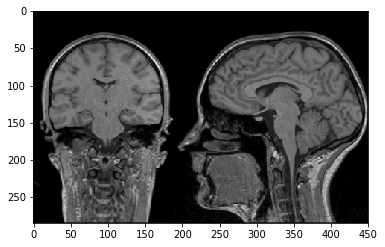

In [5]:
plt.imshow(image,cmap = "gray")

In [6]:
image = image[:,200:]

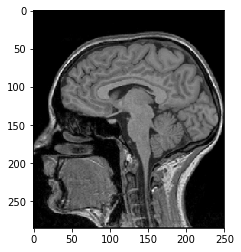

In [8]:
plt.imshow(image,cmap = "gray")

In [9]:
hist = cv2.equalizeHist(image)

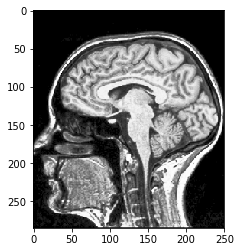

In [11]:
plt.imshow(hist,cmap = "gray")

In [19]:
ret, thresh = cv2.threshold(hist,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

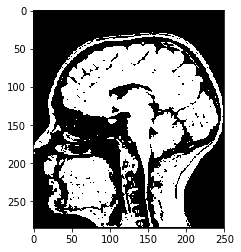

In [20]:
plt.imshow(thresh,cmap = "gray")

In [21]:
kernel = np.ones((5,5),np.uint8)

In [22]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)

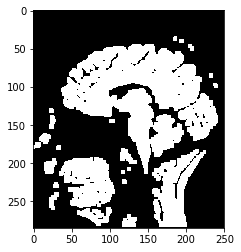

In [23]:
plt.imshow(opening,cmap = "gray")

In [24]:
help(cv2.connectedComponentsWithStats)

Help on built-in function connectedComponentsWithStats:

connectedComponentsWithStats(...)
    connectedComponentsWithStats(image[, labels[, stats[, centroids[, connectivity[, ltype]]]]]) -> retval, labels, stats, centroids



In [26]:
outputs = cv2.connectedComponentsWithStats(opening,4,cv2.CV_64F)

In [27]:
outputs[0]

24

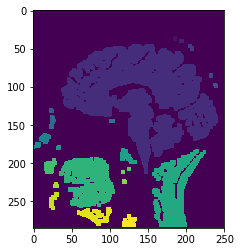

In [28]:
plt.imshow(outputs[1])

In [29]:
outputs[2]

array([[    0,     0,   250,   285, 44672],
       [  183,    34,     6,     6,    35],
       [  191,    38,     6,     5,    30],
       [   37,    44,   205,   171, 17175],
       [  203,    45,     8,     8,    51],
       [  230,    82,     6,     7,    39],
       [  236,    95,     6,     7,    38],
       [   21,   128,     6,     7,    40],
       [   21,   137,     9,    18,   126],
       [   99,   143,     8,     5,    40],
       [    8,   161,    15,    14,   154],
       [    0,   173,    11,     9,    74],
       [   30,   177,     7,     6,    39],
       [  114,   181,    22,    20,   254],
       [  156,   182,    71,   102,  3618],
       [   34,   192,    73,    67,  3436],
       [   15,   194,    16,    20,   244],
       [  123,   205,     5,     5,    25],
       [  115,   209,     5,     6,    30],
       [  117,   221,     6,     7,    41],
       [   26,   225,     8,     8,    58],
       [   21,   238,    13,    23,   179],
       [   57,   258,    46,    

In [31]:
connected = outputs[0]
labelled_image = outputs[1]
stats = outputs[2]

In [32]:
sizes = stats[:,-1]

In [33]:
sizes


array([44672,    35,    30, 17175,    51,    39,    38,    40,   126,
          40,   154,    74,    39,   254,  3618,  3436,   244,    25,
          30,    41,    58,   179,   607,   245], dtype=int32)

In [35]:
max_label = 1
max_size = sizes[1]
for i in range(2,connected):
    if(sizes[i]>max_size):
        max_size = sizes[i]
        max_label = i


In [36]:
mask = np.zeros(labelled_image.shape)

In [37]:
mask[labelled_image==max_label] = 255

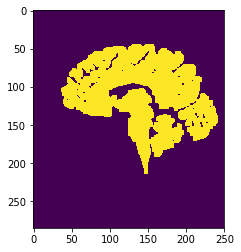

In [38]:
plt.imshow(mask)